In [1]:
## import the libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc
import re
import string
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from IPython.display import HTML
from collections import OrderedDict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import transformers
from transformers import AutoModel, BertTokenizerFast

## libraries for models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold

## libraries for ANN
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum', 'gold', 'lightskyblue', 'lavender', 'lightpink']

ModuleNotFoundError: No module named 'missingno'

In [ ]:
df = pd.read_csv('news_articles.csv')

In [ ]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.shape

(2096, 12)

Missing Values

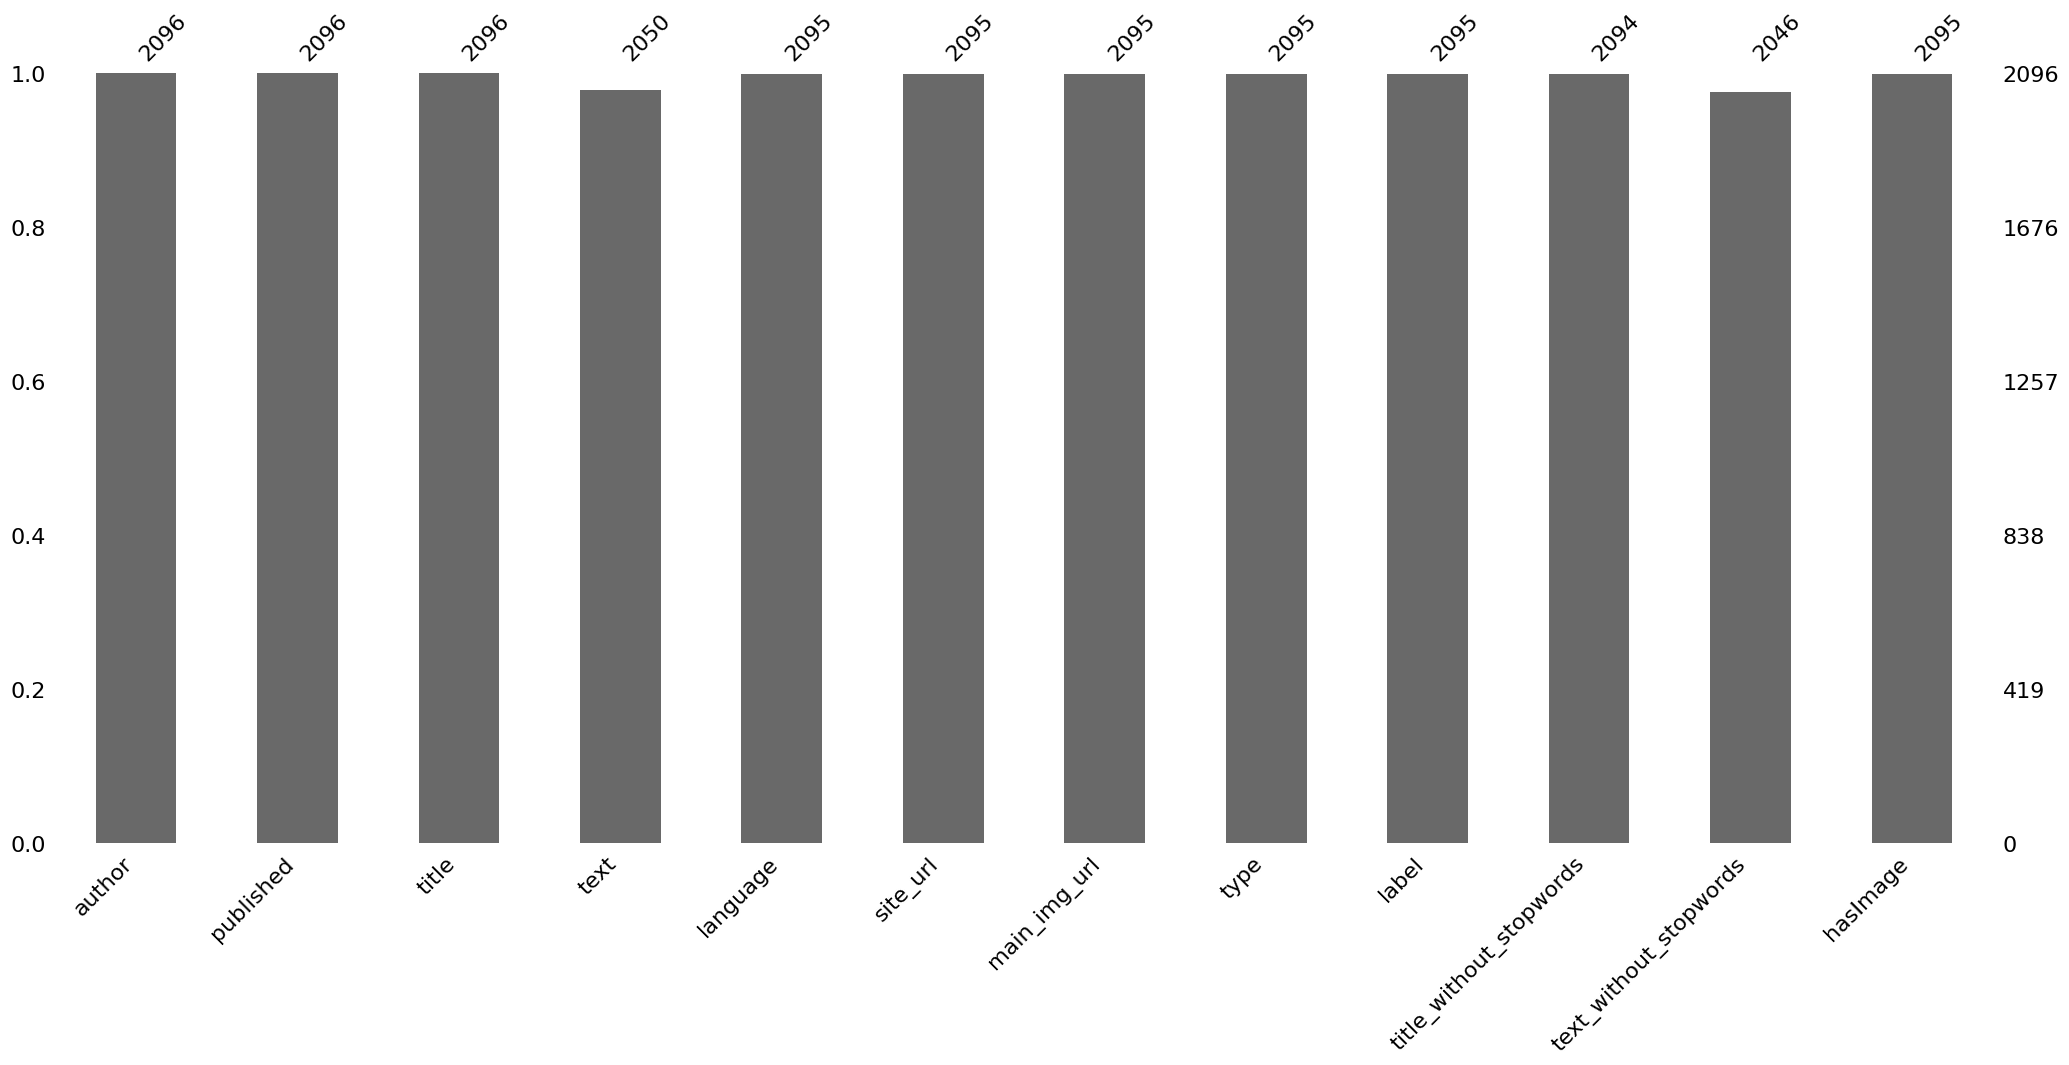

In [ ]:
msno.bar(df)
plt.show()

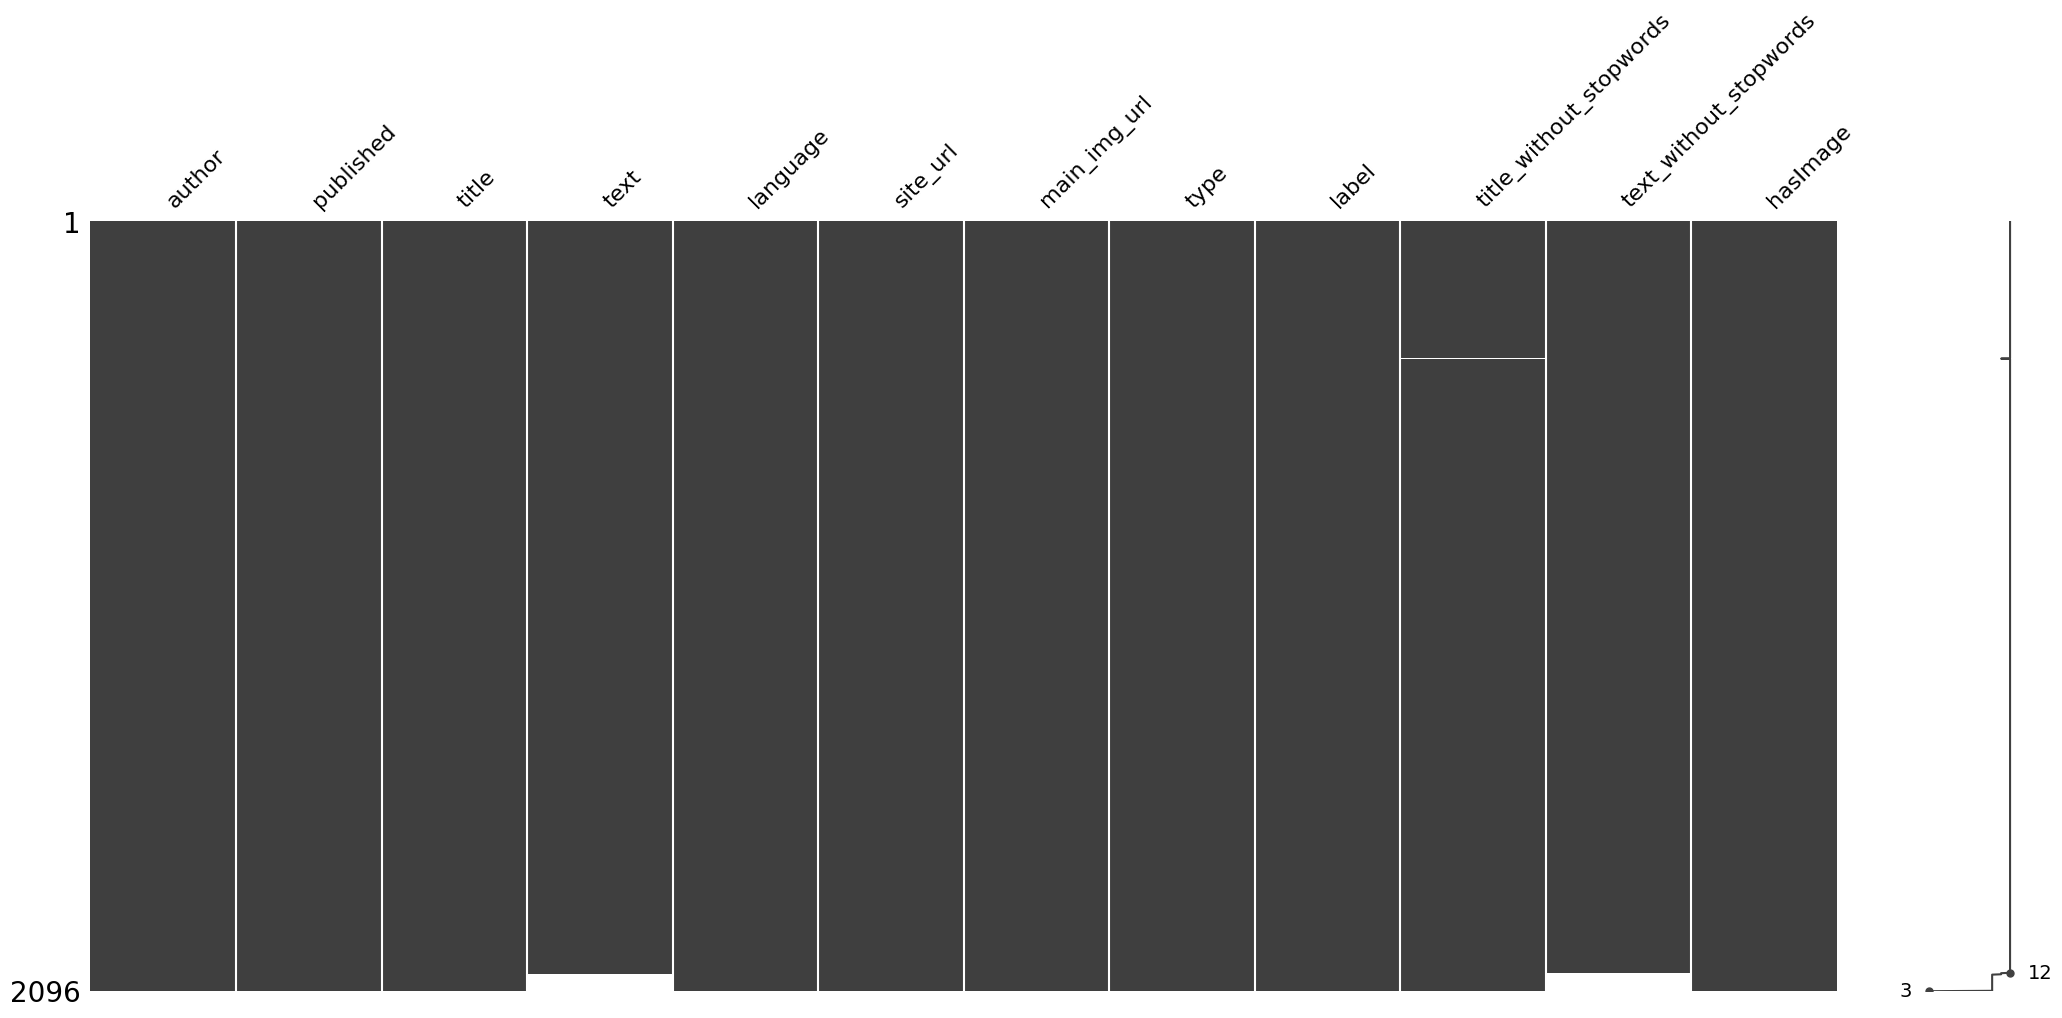

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()/len(df)*100

author                     0.000000
published                  0.000000
title                      0.000000
text                       2.194656
language                   0.047710
site_url                   0.047710
main_img_url               0.047710
type                       0.047710
label                      0.047710
title_without_stopwords    0.095420
text_without_stopwords     2.385496
hasImage                   0.047710
dtype: float64

Duplicates

In [ ]:
df.duplicated().sum()

10

# Data Cleaning

In [ ]:
df.drop_duplicates(inplace=True)

Drop Columns / Missing Values

In [ ]:
df.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [ ]:
df1 = df.drop(['title', 'text'], axis=1)
df1.head()

,author,published,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
# Drop missing values in the entire DataFrame
df.dropna(inplace=True)


In [ ]:
df.shape

(2035, 12)

# Data Exploration

In [ ]:
df.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1281.0  0.742389  0.437490  0.0  0.0  1.0  1.0  1.0
Real     754.0  0.834218  0.372132  0.0  1.0  1.0  1.0  1.0

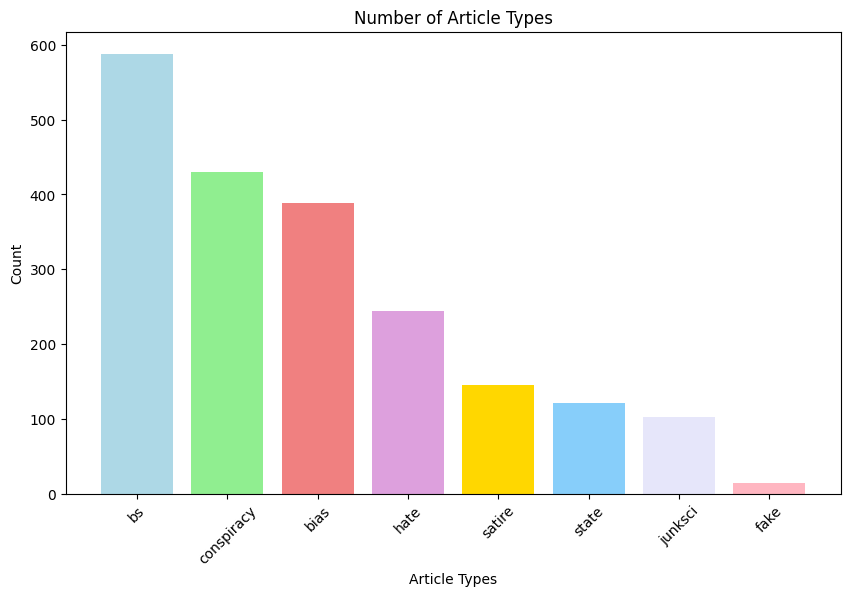

In [ ]:
type_count = df['type'].value_counts()
article_types = type_count.index
counts = type_count.values

plt.figure(figsize=(10, 6))

plt.bar(article_types, counts, color=colors)

plt.title('Number of Article Types')
plt.xlabel('Article Types')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

label
Fake    1281
Real     754
Name: text, dtype: int64


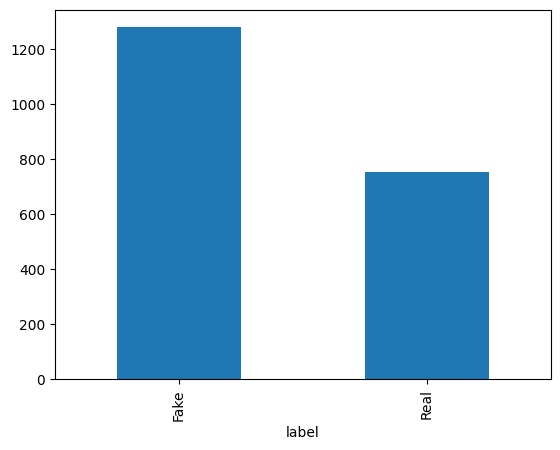

In [ ]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

Most Common Words Used

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: title={'center': 'Top 20 unigrams used in articles'}, xlabel='word'>

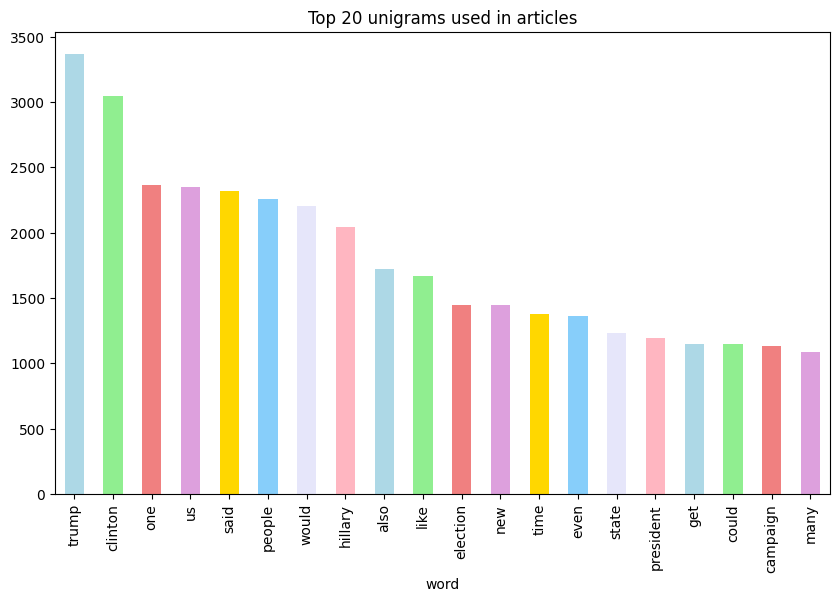

In [ ]:
# Replace NaN values in 'text_without_stopwords' with an empty string
df['text_without_stopwords'].fillna('', inplace=True)

# Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

# Usage to get top 20 words
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = pd.DataFrame(common_words, columns=['word', 'count'])

# Visualizing the top 20 words
df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 unigrams used in articles', color=colors, figsize=(10, 6)
)

C:\Users\User\AppData\Local\Temp\ipykernel_22400\909623851.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



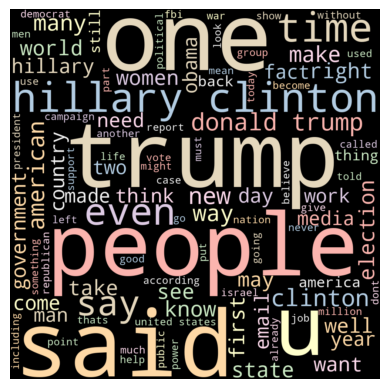

In [ ]:
pastel_colormap = plt.cm.get_cmap('Pastel1')

wc = WordCloud(
    background_color="black", 
    max_words=100,
    max_font_size=256,
    random_state=42, 
    width=1000, 
    height=1000,
    colormap=pastel_colormap  # Apply the pastel colormap to the WordCloud
)

# Generate the WordCloud
wc.generate(' '.join(df['text_without_stopwords']))

# Display the WordCloud with pastel colors
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22400\954936821.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



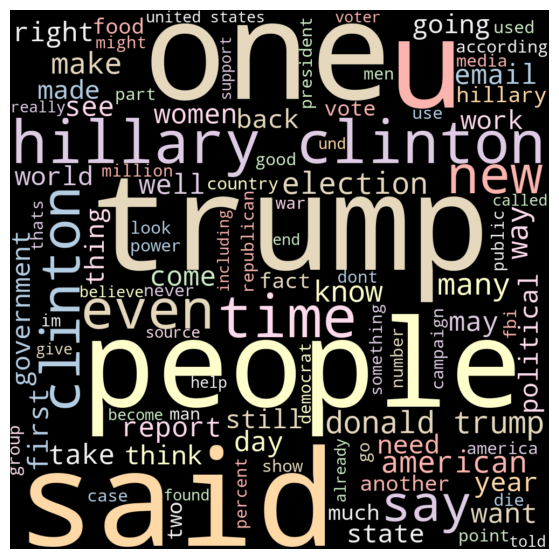

In [ ]:


fake_data = df[df["label"] == "Fake"]
all_fake_words = ' '.join([text for text in fake_data['text_without_stopwords']])

pastel_colormap = plt.cm.get_cmap('Pastel1')

wc = WordCloud(
    background_color="black", 
    max_words=100,
    max_font_size=256,
    random_state=42, 
    width=1000, 
    height=1000,
    colormap=pastel_colormap  # Apply the pastel colormap to the WordCloud
)

# Generate the WordCloud for 'fake' news articles
wc.generate(all_fake_words)

# Display the WordCloud with pastel colors for 'fake' news
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22400\2151592519.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



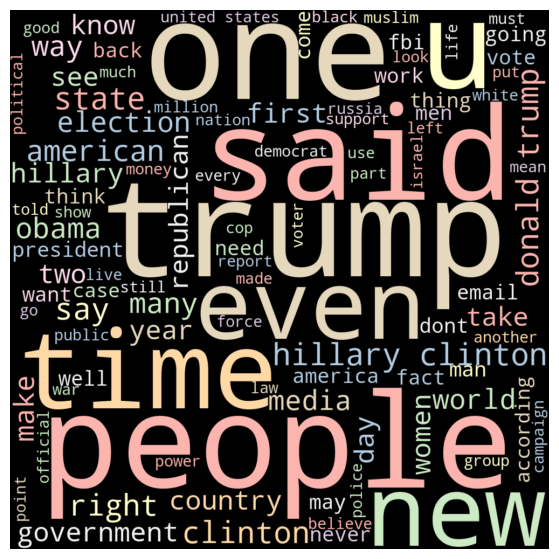

In [ ]:

real_data = df[df["label"] == "Real"]
all_real_words = ' '.join([text for text in real_data['text_without_stopwords']])

pastel_colormap = plt.cm.get_cmap('Pastel1')

wc = WordCloud(
    background_color="black", 
    max_words=100,
    max_font_size=256,
    random_state=42, 
    width=1000, 
    height=1000,
    colormap=pastel_colormap  # Apply the pastel colormap to the WordCloud
)

# Generate the WordCloud for 'Real' news articles
wc.generate(all_real_words)

# Display the WordCloud with pastel colors for 'Real' news
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
real_data = df[df["label"] == "Real"]
print(real_data.shape)  # Check the shape of the filtered 'Real' news category


(754, 12)


C:\Users\User\AppData\Local\Temp\ipykernel_22400\4107831795.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



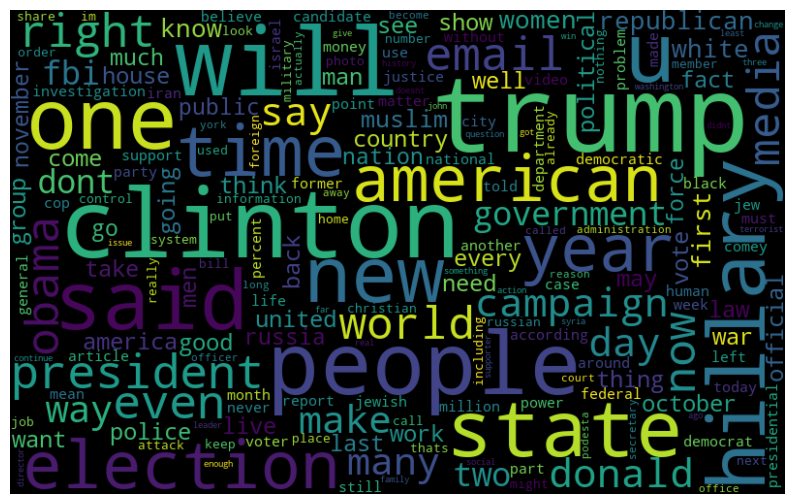

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data['text'] = real_data['text'].apply(lambda x: str(x))
all_words = ' '.join(real_data['text'])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk import tokenize

In [ ]:
# Most frequent words counter   

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



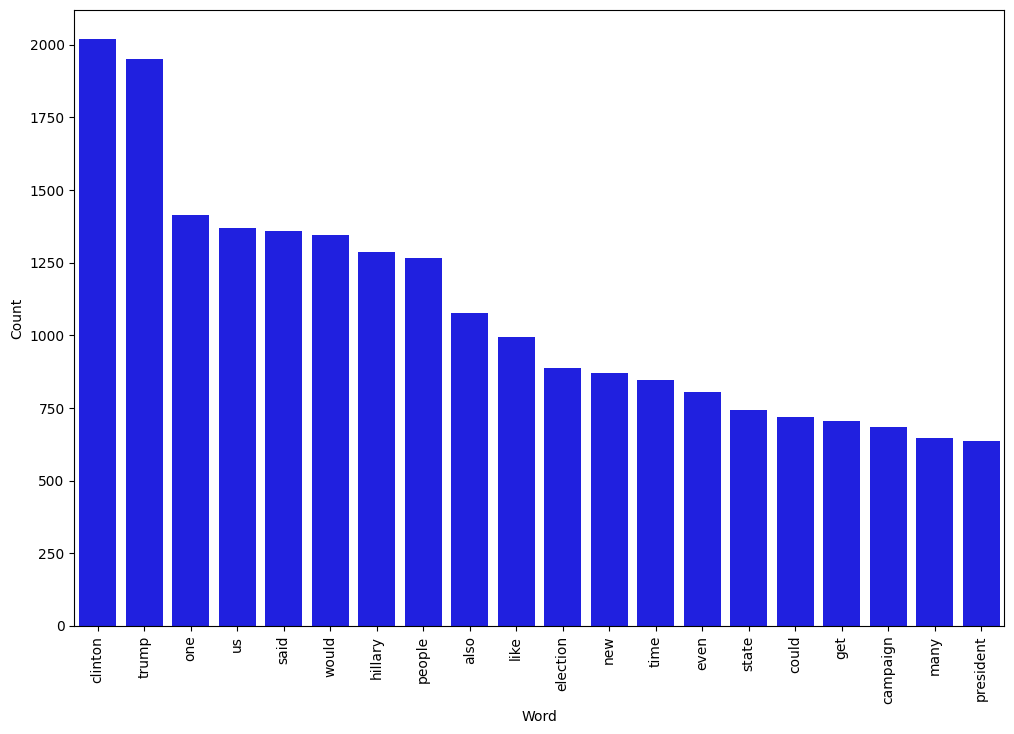

In [ ]:
# Most frequent words in fake news
counter(df[df["label"] == "Fake"], "text_without_stopwords", 20)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



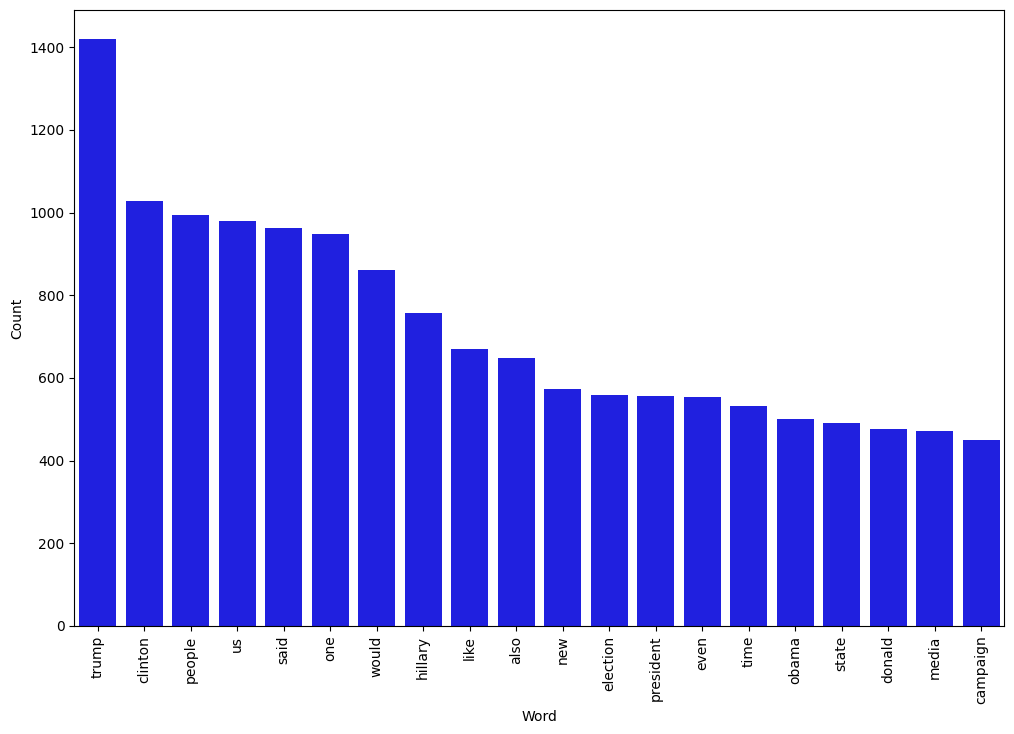

In [ ]:
# Most frequent words in real news
counter(df[df["label"] == "Real"], "text_without_stopwords", 20)

In [ ]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [ ]:
def convert(path):
    return '<img src="'+ path + '" width="80">'

In [ ]:
df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)

In [ ]:
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
6,100percentfedup.com,Real,
7,100percentfedup.com,Real,
8,100percentfedup.com,Real,
9,100percentfedup.com,Real,


In [ ]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
33,21stcenturywire.com,Fake,
34,21stcenturywire.com,Fake,
35,21stcenturywire.com,Fake,
36,21stcenturywire.com,Fake,
37,21stcenturywire.com,Fake,
38,21stcenturywire.com,Fake,


Change String Values

In [ ]:
df['label1'] = pd.get_dummies(df.label)['Real'].astype(int)
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,label1
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,1
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,1
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,1
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,1
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,1


## Train the Data

In [ ]:
# Split the data
X = df['text_without_stopwords']
y = df.label1
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=35)

In [ ]:
print(X.shape)  
print(y.shape)  

(2035,)
(2035,)


In [ ]:
X_train.head()

1869    well know think basket full uneducated deplora...
1939    snow reports around northland saturday andrew ...
590     email election day fast approaching citizens e...
564     email north koreas foreign ministry slammed sh...
1857    megyn kelly fallen th fox show ratings paid ki...
Name: text_without_stopwords, dtype: object

Covert Text to Vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

# Models

### Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(XV_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(XV_test)

In [ ]:
LR.score(XV_test, y_test)

0.7151277013752456

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       318
           1       0.84      0.30      0.44       191

    accuracy                           0.72       509
   macro avg       0.77      0.63      0.62       509
weighted avg       0.75      0.72      0.67       509



In [ ]:
## model evaluation
accuracy_LR = accuracy_score(y_test, pred_lr)

## confusion matrix
conf_mat_LR = confusion_matrix(y_test, pred_lr)


print(accuracy_LR)
print(conf_mat_LR)

0.7151277013752456
[[307  11]
 [134  57]]


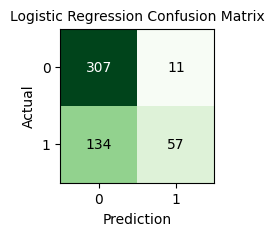

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

In [ ]:
# Vectorizing and applying TF-IDF
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

# Fitting the model
model_logreg = pipe.fit(X_train, y_train)

# Accuracy
pred_logreg = model_logreg.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, pred_logreg) * 100, 2)))


Accuracy: 71.51%


#### Decision Tree Pipeline

In [ ]:
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=32))])
# Fitting the model
model_dt = pipe.fit(X_train, y_train)

# Accuracy
pred_dt = model_dt.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_dt)*100,2)))

accuracy: 75.05%


In [ ]:
## model evaluation
accuracy_dt = accuracy_score(y_test, pred_dt )

## confusion matrix
conf_mat_dt = confusion_matrix(y_test, pred_dt)


print(accuracy_dt)
print(conf_mat_dt)

0.75049115913556
[[267  51]
 [ 76 115]]


In [ ]:
## classification report
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       318
           1       0.69      0.60      0.64       191

    accuracy                           0.75       509
   macro avg       0.74      0.72      0.73       509
weighted avg       0.75      0.75      0.75       509



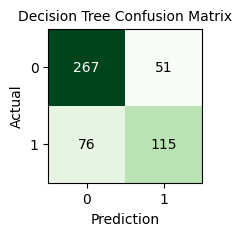

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_dt, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Decision Tree Confusion Matrix', fontsize = 10)
plt.show()

In [ ]:
DTV = DecisionTreeClassifier()
DTV.fit(XV_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtV = DTV.predict(XV_test)

In [ ]:
DTV.score(XV_test, y_test)

0.7603143418467584

In [ ]:
## model evaluation
accuracy_dtV = accuracy_score(y_test, pred_dtV)

## confusion matrix
conf_mat_dtV = confusion_matrix(y_test, pred_dtV)


print(accuracy_dt)
print(conf_mat_dt)

0.75049115913556
[[267  51]
 [ 76 115]]


In [ ]:
## classification report
print(classification_report(y_test, pred_dtV))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       318
           1       0.69      0.66      0.67       191

    accuracy                           0.76       509
   macro avg       0.74      0.74      0.74       509
weighted avg       0.76      0.76      0.76       509



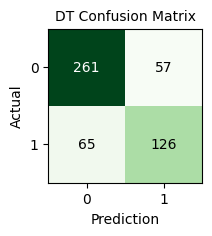

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_dtV, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('DT Confusion Matrix', fontsize = 10)
plt.show()

Gradient Boosting Classifier

In [ ]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(XV_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_GB = GB.predict(XV_test)

In [ ]:
GB.score(XV_test,y_test)

0.7996070726915521

In [ ]:
## model evaluation
accuracy_GB = accuracy_score(y_test, pred_GB)

## confusion matrix
conf_mat_GB= confusion_matrix(y_test, pred_GB)


print(accuracy_GB)
print(conf_mat_GB)

0.7996070726915521
[[305  13]
 [ 89 102]]


In [ ]:
## classification report
print(classification_report(y_test, pred_GB))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       318
           1       0.89      0.53      0.67       191

    accuracy                           0.80       509
   macro avg       0.83      0.75      0.76       509
weighted avg       0.82      0.80      0.79       509



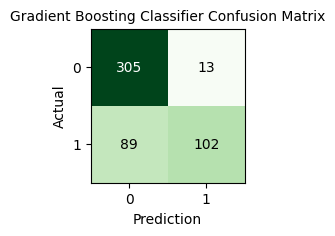

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_GB, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Gradient Boosting Classifier Confusion Matrix', fontsize = 10)
plt.show()

Random Forest Classifier

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(XV_test)

In [ ]:
RF.score(XV_test, y_test)

0.7662082514734774

In [ ]:
## model evaluation
accuracy_RF = accuracy_score(y_test, pred_rf)

## confusion matrix
conf_mat_RF= confusion_matrix(y_test, pred_rf)


print(accuracy_RF)
print(conf_mat_RF)

0.7662082514734774
[[306  12]
 [107  84]]


In [ ]:
## classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       318
           1       0.88      0.44      0.59       191

    accuracy                           0.77       509
   macro avg       0.81      0.70      0.71       509
weighted avg       0.79      0.77      0.74       509



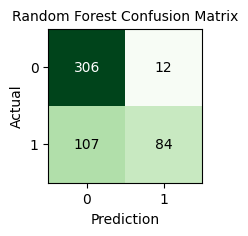

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_RF, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Random Forest Confusion Matrix', fontsize = 10)
plt.show()

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W',"", text)
    text = re.sub('https?://\S+','', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def output_lable(n):
    if n ==0:
        return 'Fake'
    elif n==1:
        return 'Real'
    
def manual_testing(news):
    testing_news = {'test':[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['test'] = new_def_test['text'].apply(wordopt)
    new_X_test = new_def_test['text']
    new_XV_test = vectorization.transform(new_X_test)
    pred_LR = LR.predict(new_XV_test)
    pred_DTV = DTV.predict(new_XV_test)
    pred_GB = GB.predict(new_XV_test)
    pred_RFC = RF.predict(new_XV_test)
    
    return print('\n\nLR Prediction:{} \nDT Prediction: {} \nGBC Predcition: {} \nRFC Prediction: {}'.format(output_lable(pred_LR[0]),
                                                                                                        output_lable(pred_GB[0]),
                                                                                                        output_lable(pred_RFC[0])))


In [ ]:
news = string(input())
manual_testing(news)

TypeError: 'module' object is not callable

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

# Load BERT model and tokenizer via HuggingFace Transformers (TensorFlow version)
bert = TFAutoModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(df['title_without_stopwords'], df['label1'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

Text(0, 0.5, 'Number of texts')

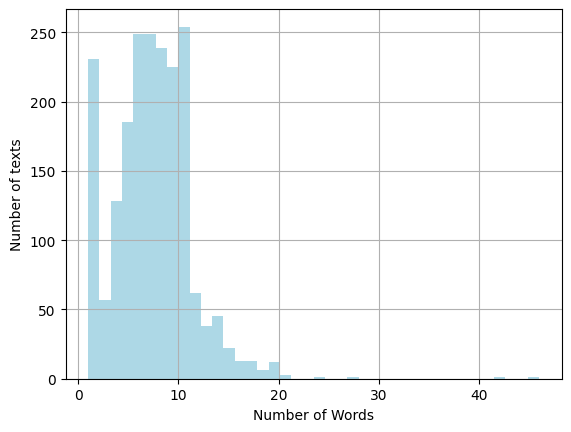

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in df['title_without_stopwords']]

pd.Series(seq_len).hist(bins = 40,color='lightblue')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
# BERT Tokeizer Functionality
sample_data = ["Build fake news model.", 
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


In [ ]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:2606: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
import torch

# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

Freeze Layers

In [ ]:

# Freeze the BERT model's layers
model.trainable = False  # This will freeze all layers in the model


NameError: name 'model' is not defined

Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):  
      super(BERT_Arch, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss() 
# Number of training epochs
epochs = 2

NameError: name 'nn' is not defined

In [ ]:
# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch 
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluating...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

model training

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

model performance

In [ ]:
# load weights of best model
path = 'c1_fakenews_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

fake news predictor

In [ ]:
# # load weights of best model
# path = 'c1_fakenews_weights.pt'
# model.load_state_dict(torch.load(path))

In [ ]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds